In [5]:
import yt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import colormaps
import scipy
import pandas as pd
import os
import glob
from astropy.cosmology import FlatLambdaCDM
import pickle
yt.set_log_level(50)

# Load data

In [6]:
RamsesDir = '/minkewhale/kimm/rey/G8_normal/GTT_9pc'
timestep = 203
extra_particle_fields = [("particle_birth_time", "float64"), ("particle_metallicity", "float64"), ("particle_imass", "float64")]
ds = yt.load(f'{RamsesDir}/output_{timestep:05d}', extra_particle_fields=extra_particle_fields)

In [7]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'mesh_id'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_birth_time'),
 ('all', 'particle_identity'),
 ('all', 'particle_imass'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('

# Maps

Face on map of density


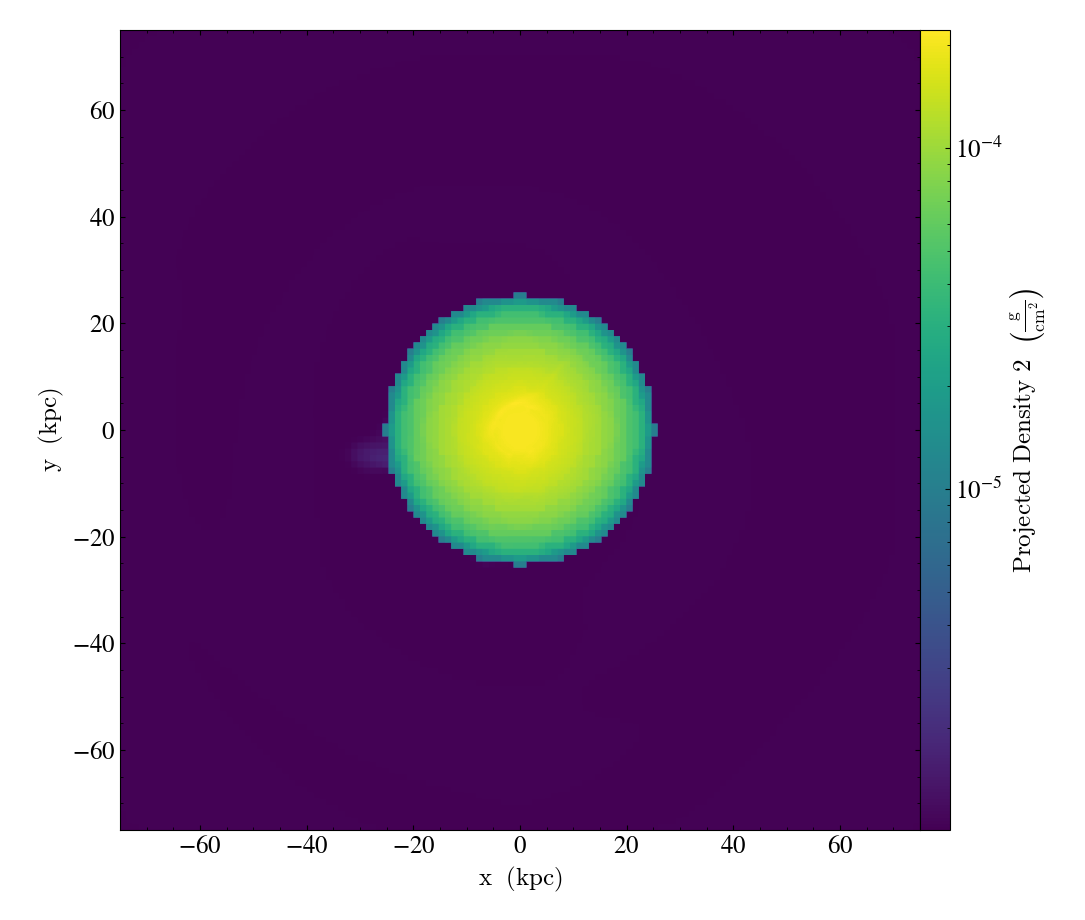

In [3]:
projection_density = yt.ProjectionPlot(ds, 'z', ("gas", "density_2"), weight_field = None)
projection_density.set_cmap(("gas", "density_2"), "viridis")
projection_density.zoom(1)
projection_density.show()

Edge on map of density


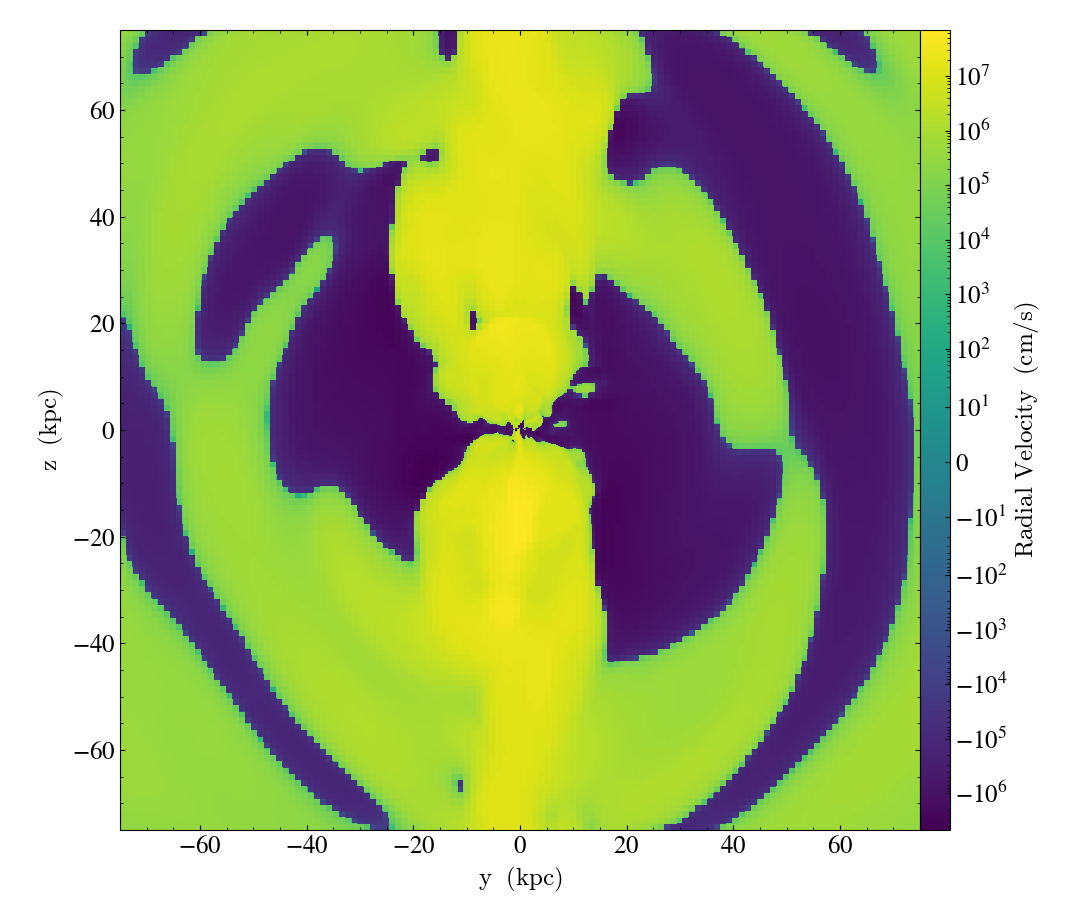

In [8]:
projection_density = yt.SlicePlot(ds, 'x', ("gas", "radial_velocity"))
projection_density.set_cmap(("gas", "radial_velocity"), "viridis")
projection_density.zoom(1)
projection_density.show()

Edge on map of temperature


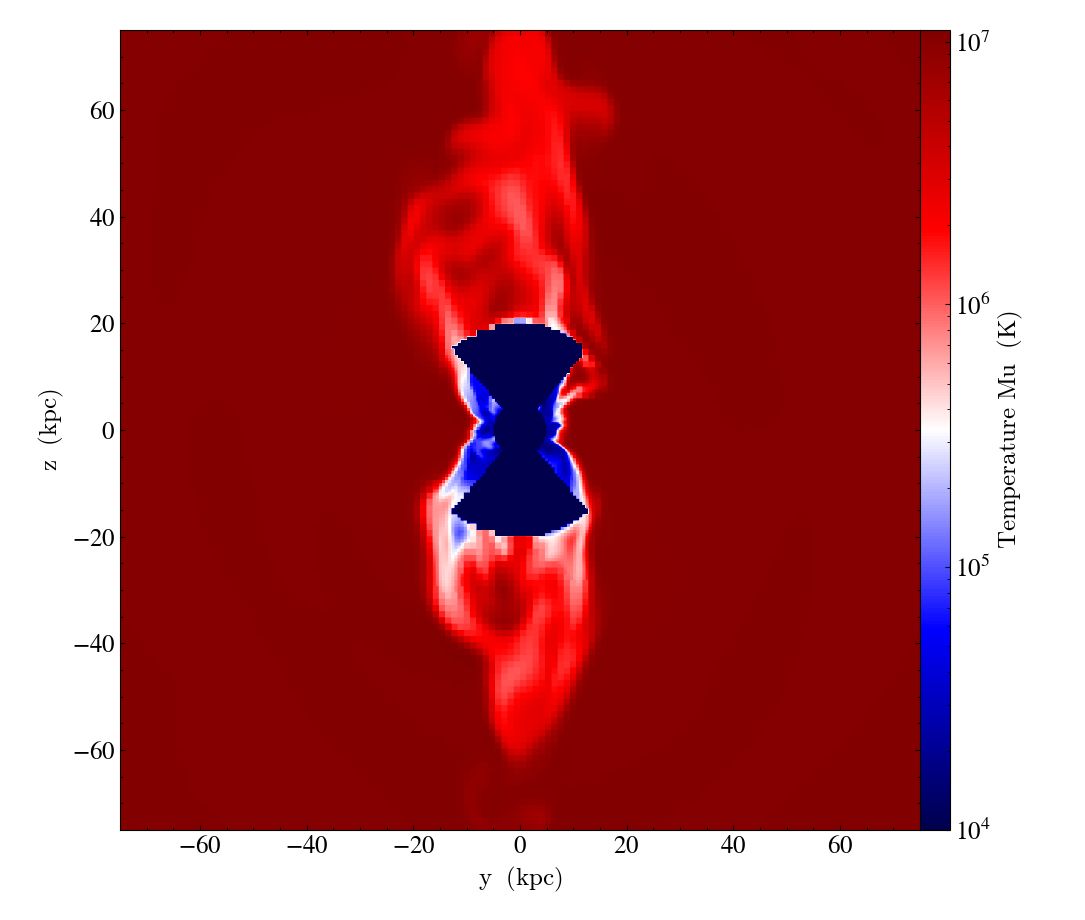

In [3]:
projection_density = yt.SlicePlot(ds, 'x', ("gas", "temperature_mu"))
projection_density.set_cmap(("gas", "temperature_mu"), "seismic")
projection_density.zoom(1)
projection_density.show()

# SFR plot

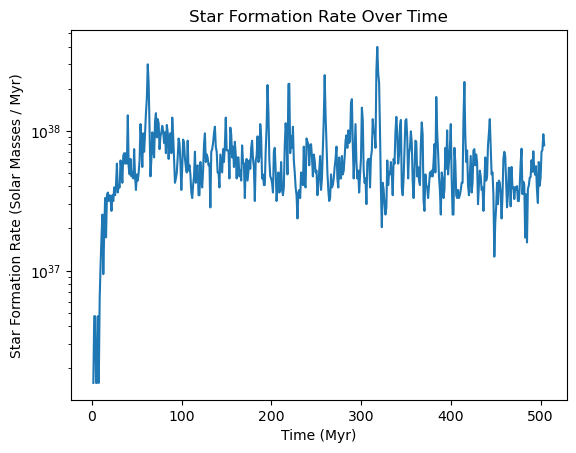

In [49]:
#This part is mainly ChatGPT
star_masses = ds.all_data()["particle_mass"]
formation_times = ds.all_data()["particle_birth_time"].in_units('Myr')

# Select stars that formed within the time interval

time_start = np.min(formation_times)  # Earliest star formation time
time_end = np.max(formation_times)

delta_t = time_end - time_start

n_bins = 500  # Number of time bins for SFR calculation

# Create time bins
time_bins = np.linspace(time_start, time_end, n_bins)
sfr_values = []

# Calculate SFR in each time bin (mass formed per time interval)
for i in range(1, len(time_bins)):
    # Find stars that formed within the current time bin
    in_bin = (formation_times >= time_bins[i-1]) & (formation_times < time_bins[i])
    
    # Total mass of stars formed in this time bin
    mass_formed_in_bin = np.sum(star_masses[in_bin])
    
    # Time interval (Δt)
    delta_t = time_bins[i] - time_bins[i-1]
    
    # SFR is mass formed divided by the time interval
    sfr_in_bin = mass_formed_in_bin / delta_t
    sfr_values.append(sfr_in_bin)


sfr_values = np.array(sfr_values)

# Midpoints of the time bins for plotting
time_midpoints = 0.5 * (time_bins[:-1] + time_bins[1:])


# Plot the SFR as a function of time
plt.plot(time_midpoints[1:], sfr_values[1:])

# Add labels and title
plt.xlabel('Time (Myr)')  # Modify units if necessary
plt.yscale('log')
plt.ylabel('Star Formation Rate (Solar Masses / Myr)')
plt.title('Star Formation Rate Over Time')

plt.show()